In [9]:
import pandas as pd
# GDPC1: Billions of chained 2017 dollars
# DSPIC96: disposable income
# GDPDEF: GDP deflator
# UNRATE unemployment rate
# IITTRHB: Individual income tax

# Import Real GDP data
df = pd.read_csv("fredgraph.csv")
df.tail(10)

,observation_date,GDPC1,DSPIC96,GDPDEF,UNRATE,IITTRHB
46,2016-01-01,19141.672,14172.3,98.238,4.9,39.6
47,2017-01-01,19612.103,14614.0,99.995,4.4,39.6
48,2018-01-01,20193.895,15143.6,102.288,3.9,37.0
49,2019-01-01,20715.672,15617.0,103.975,3.7,NaN
50,2020-01-01,20267.585,16608.6,105.346,8.1,NaN
51,2021-01-01,21494.798,17189.1,110.142,5.4,NaN
52,2022-01-01,22034.829,16228.7,118.016,3.6,NaN
53,2023-01-01,22671.097,17052.4,122.266,3.6,NaN
54,2024-01-01,23305.024,17511.1,125.224,4.0,NaN
55,2025-01-01,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Percent')

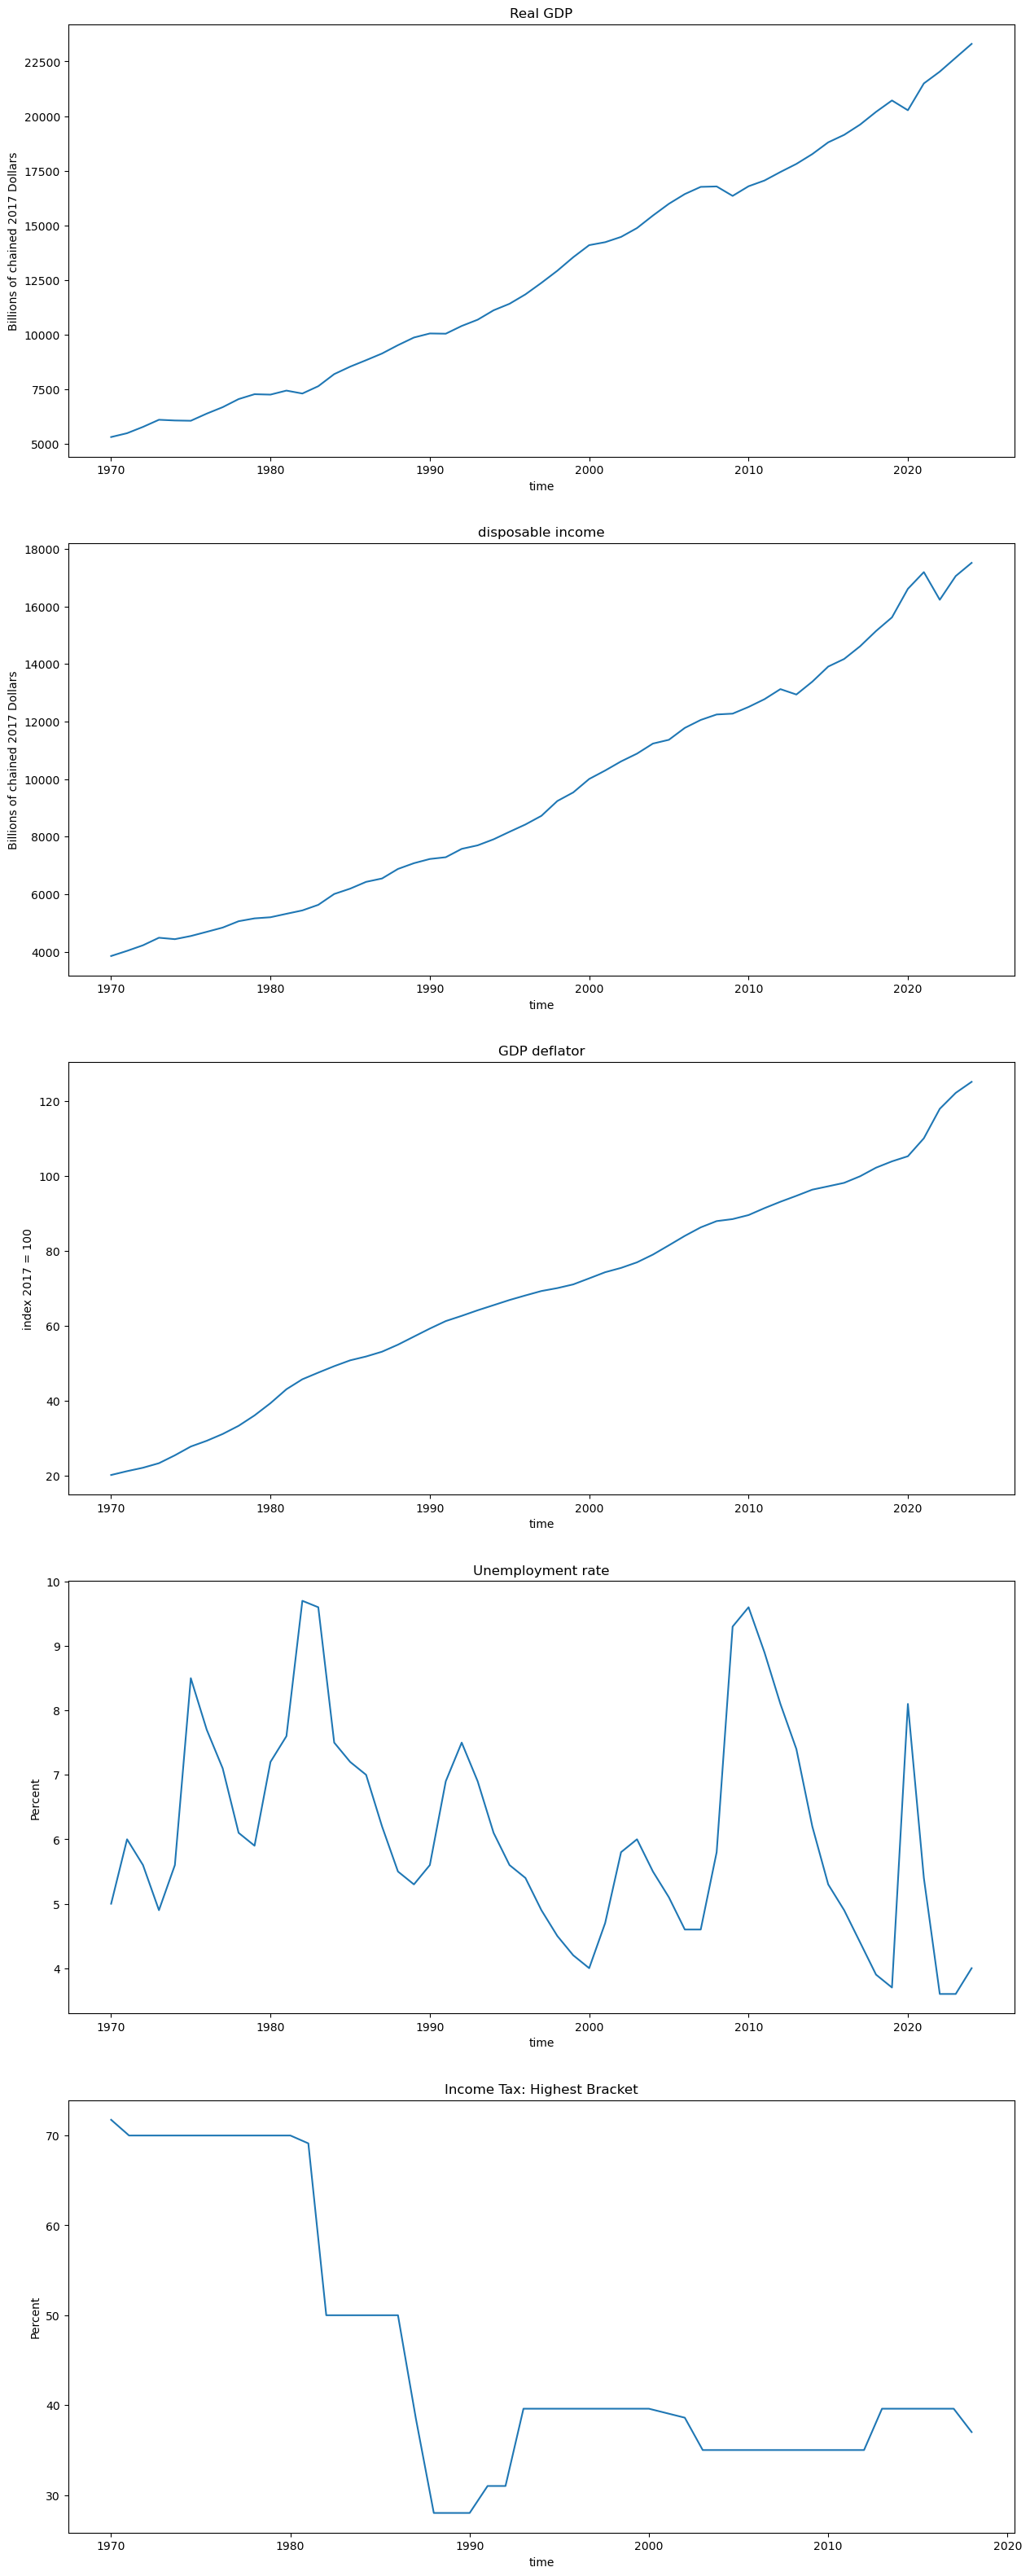

In [10]:
# plot the data
import seaborn as sns
import matplotlib.pyplot as plt
df["time"] = pd.to_datetime(df["observation_date"].str.replace("-Q", "-"))
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 40))

sns.lineplot(x=df['time'], y=df['GDPC1'], ax=ax[0])
ax[0].set_title('Real GDP')
ax[0].set_ylabel('Billions of chained 2017 Dollars')

sns.lineplot(x=df['time'], y=df['DSPIC96'], ax=ax[1])
ax[1].set_title('disposable income')
ax[1].set_ylabel('Billions of chained 2017 Dollars')

sns.lineplot(x=df['time'], y=df['GDPDEF'], ax=ax[2])
ax[2].set_title('GDP deflator')
ax[2].set_ylabel('index 2017 = 100')

sns.lineplot(x=df['time'], y=df['UNRATE'], ax=ax[3])
ax[3].set_title('Unemployment rate')
ax[3].set_ylabel('Percent')

sns.lineplot(x=df['time'], y=df['IITTRHB'], ax=ax[4])
ax[4].set_title('Income Tax: Highest Bracket')
ax[4].set_ylabel('Percent')


Text(0.5, 1.0, 'Income Tax: Highest Bracket')

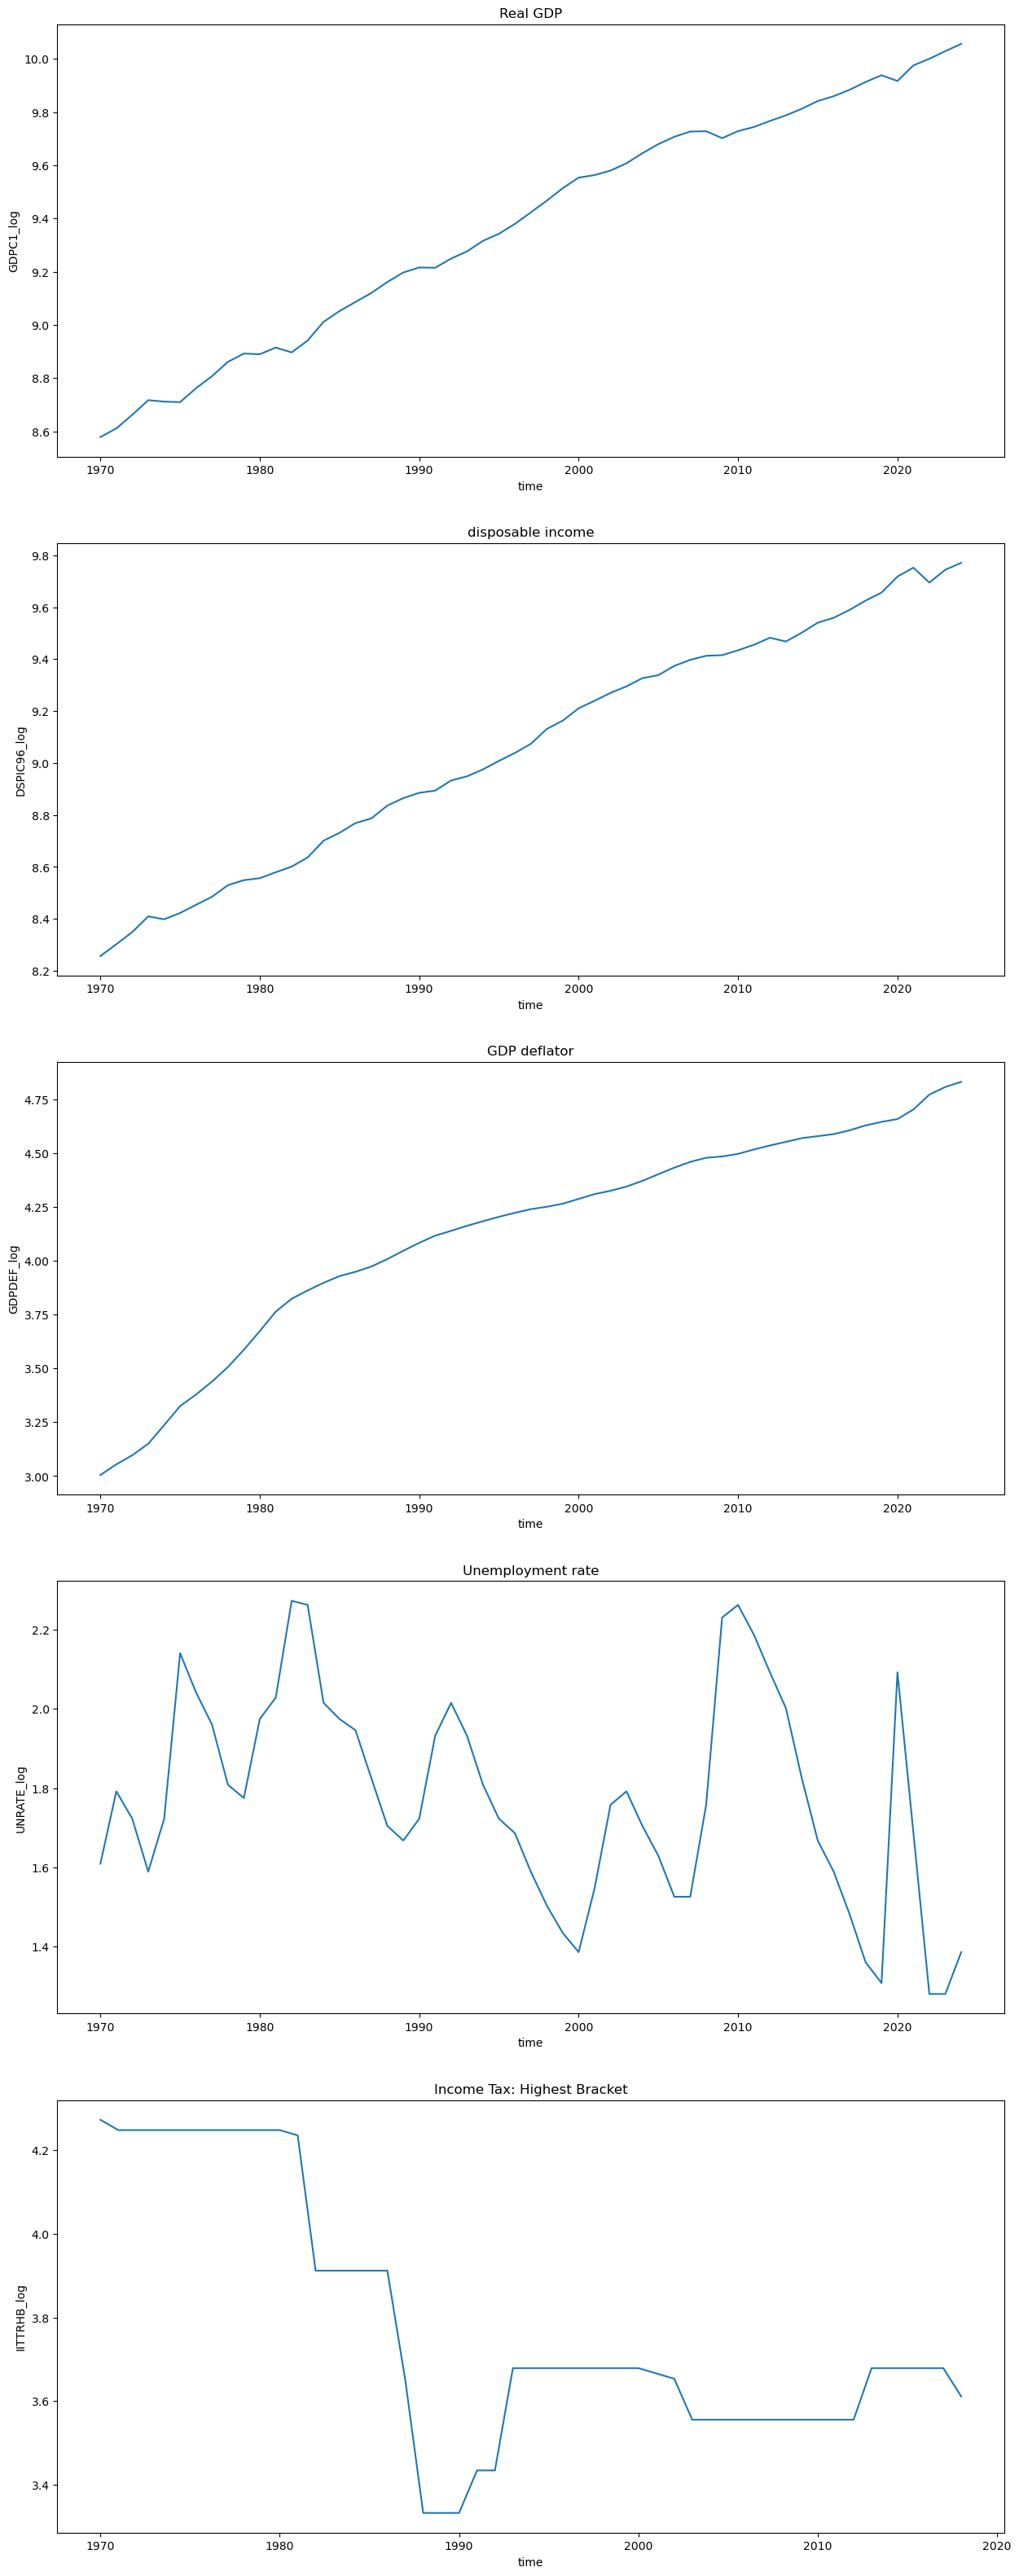

In [11]:
# log transformation
import numpy as np

df['GDPC1_log'] = np.log(abs(df.GDPC1))
df['DSPIC96_log'] = np.log(abs(df.DSPIC96))
df['GDPDEF_log'] = np.log(abs(df.GDPDEF))
df['UNRATE_log'] = np.log(abs(df.UNRATE))
df['IITTRHB_log'] = np.log(abs(df.IITTRHB))
df.head()

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 40))

sns.lineplot(x=df['time'], y=df['GDPC1_log'], ax=ax[0])
ax[0].set_title('Real GDP')

sns.lineplot(x=df['time'], y=df['DSPIC96_log'], ax=ax[1])
ax[1].set_title('disposable income')

sns.lineplot(x=df['time'], y=df['GDPDEF_log'], ax=ax[2])
ax[2].set_title('GDP deflator')

sns.lineplot(x=df['time'], y=df['UNRATE_log'], ax=ax[3])
ax[3].set_title('Unemployment rate')


sns.lineplot(x=df['time'], y=df['IITTRHB_log'], ax=ax[4])
ax[4].set_title('Income Tax: Highest Bracket')


Text(0.5, 1.0, 'Correlation Matrix of the economic indicators')

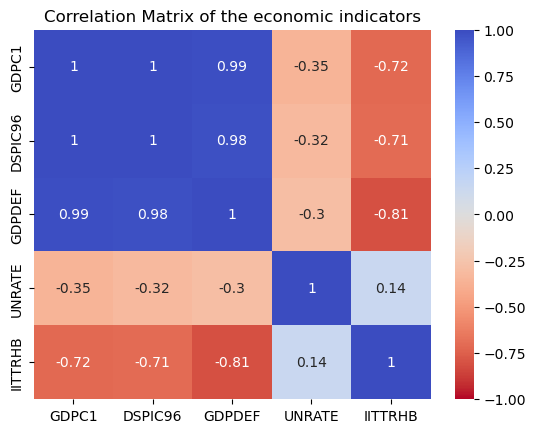

In [12]:
# correlation map
column = ['GDPC1', 'DSPIC96', 'GDPDEF', 'UNRATE', 'IITTRHB']
corrmat = df[column].corr()
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
plt.title('Correlation Matrix of the economic indicators')

# Using TimeSeriesSplit to forcast the data
*

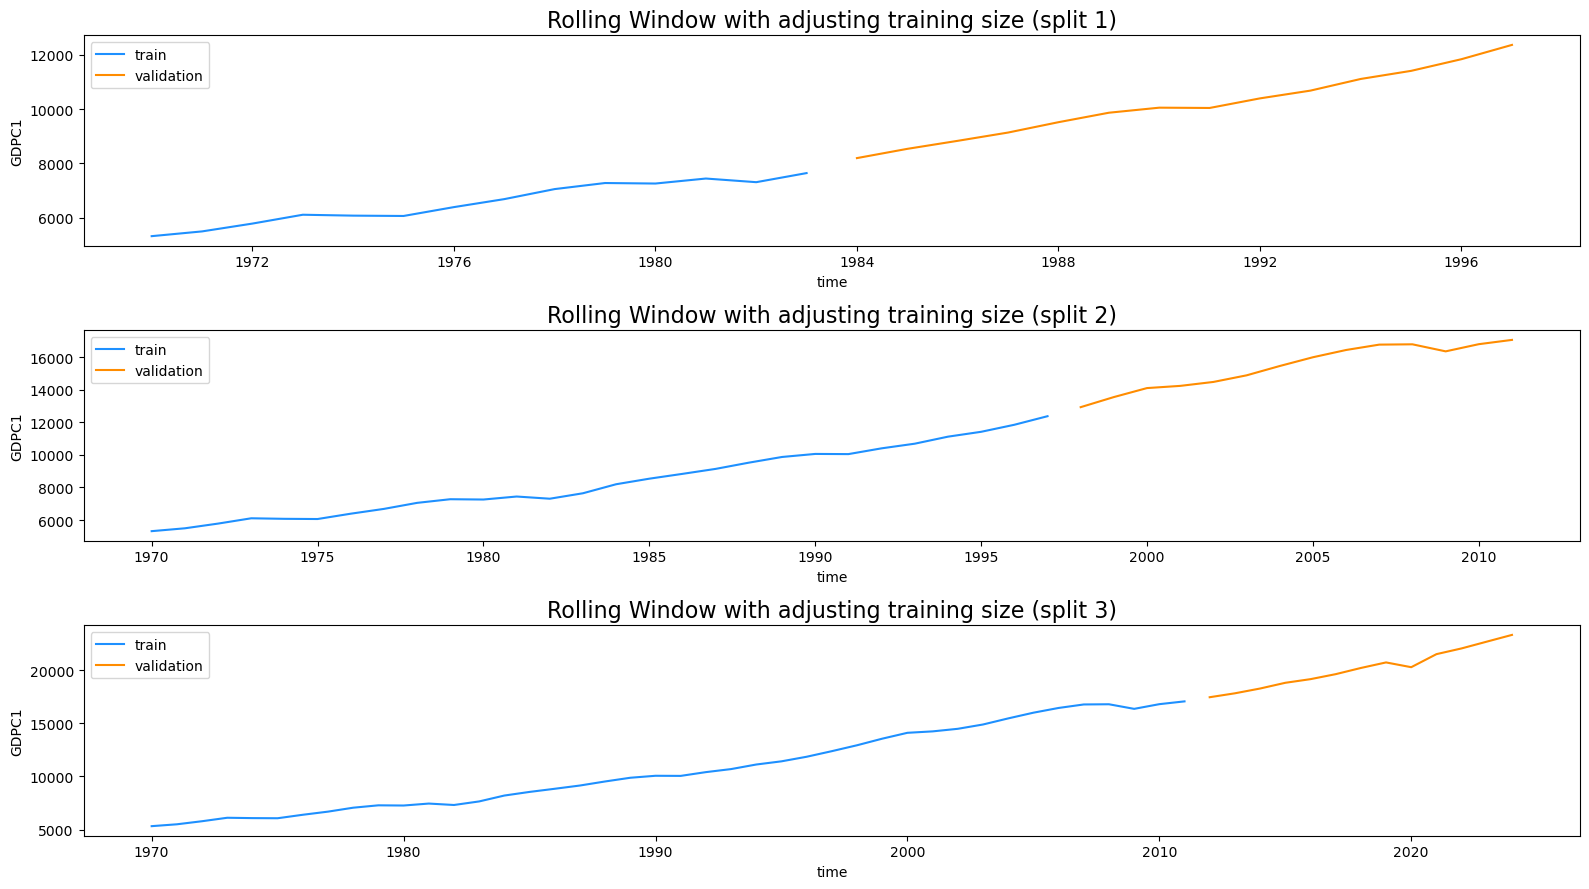

In [13]:
from sklearn.model_selection import TimeSeriesSplit as tss


def time_series(y_data):
    N_splits = 3
    X = df.time
    Y = df[y_data]
    folds = tss(n_splits=N_splits)

    f, ax = plt.subplots(nrows=N_splits, ncols=1, figsize=(16, 9))
    for i,(train_index, valid_index) in enumerate(folds.split(X)):
        X_train, X_valid = X[train_index], X[valid_index]
        Y_train, Y_valid = Y[train_index], Y[valid_index]
        sns.lineplot(x=X_train, y=Y_train, ax=ax[i], label='train', color='dodgerblue')
        sns.lineplot(x=X_valid, y=Y_valid, ax=ax[i], label='validation', color='darkorange')

        ax[i].set_title(f'Rolling Window with adjusting training size (split {i+1})', fontsize=16)

    plt.tight_layout()
    plt.show()

time_series('GDPC1')




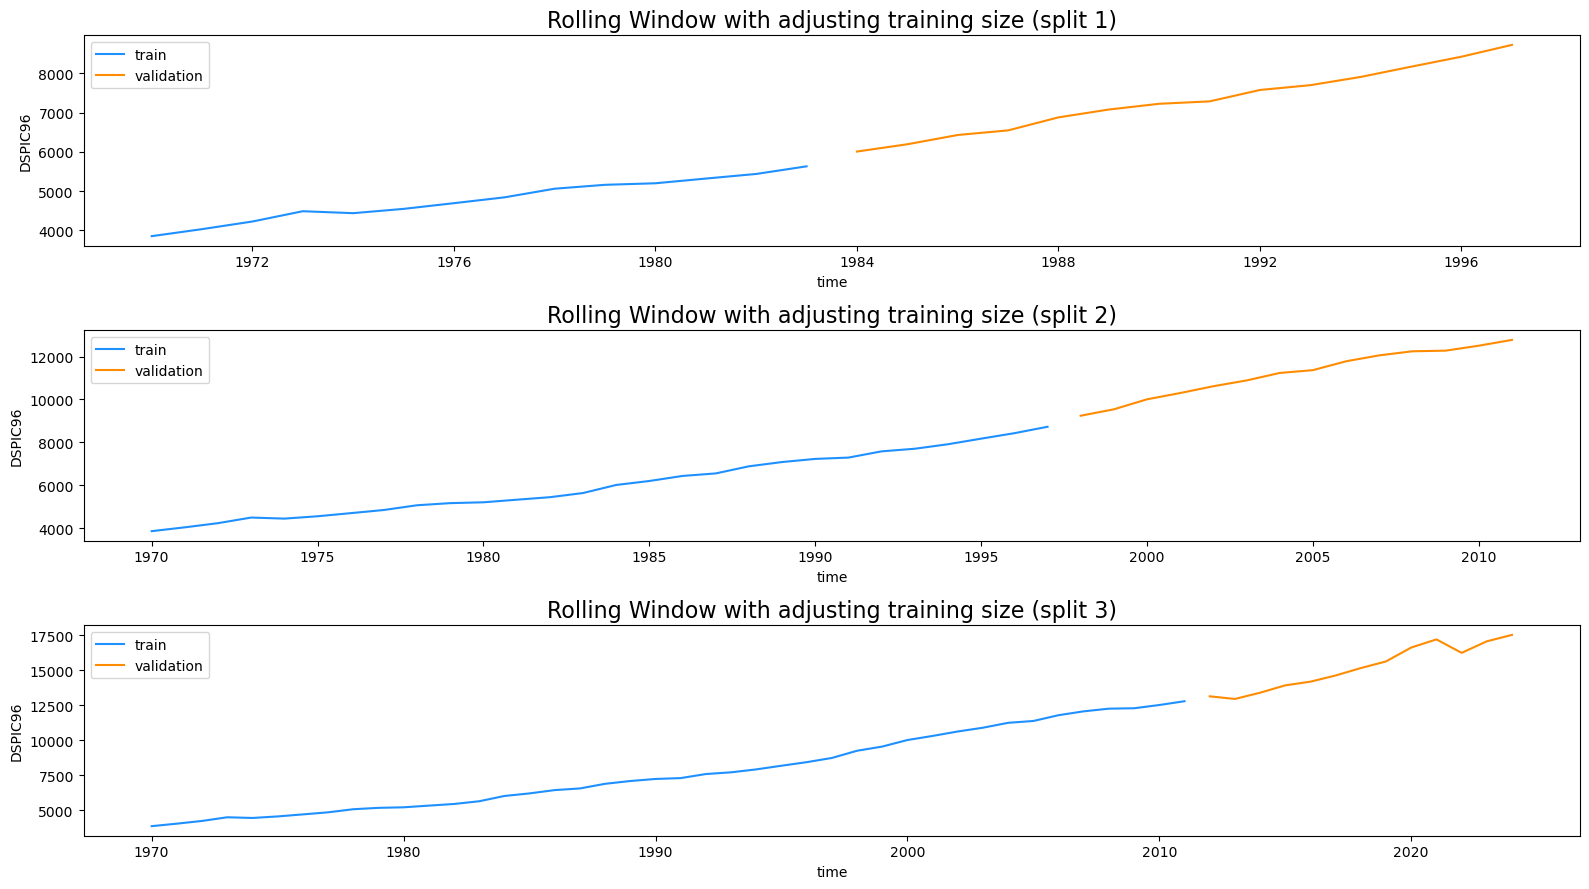

In [14]:
time_series('DSPIC96')

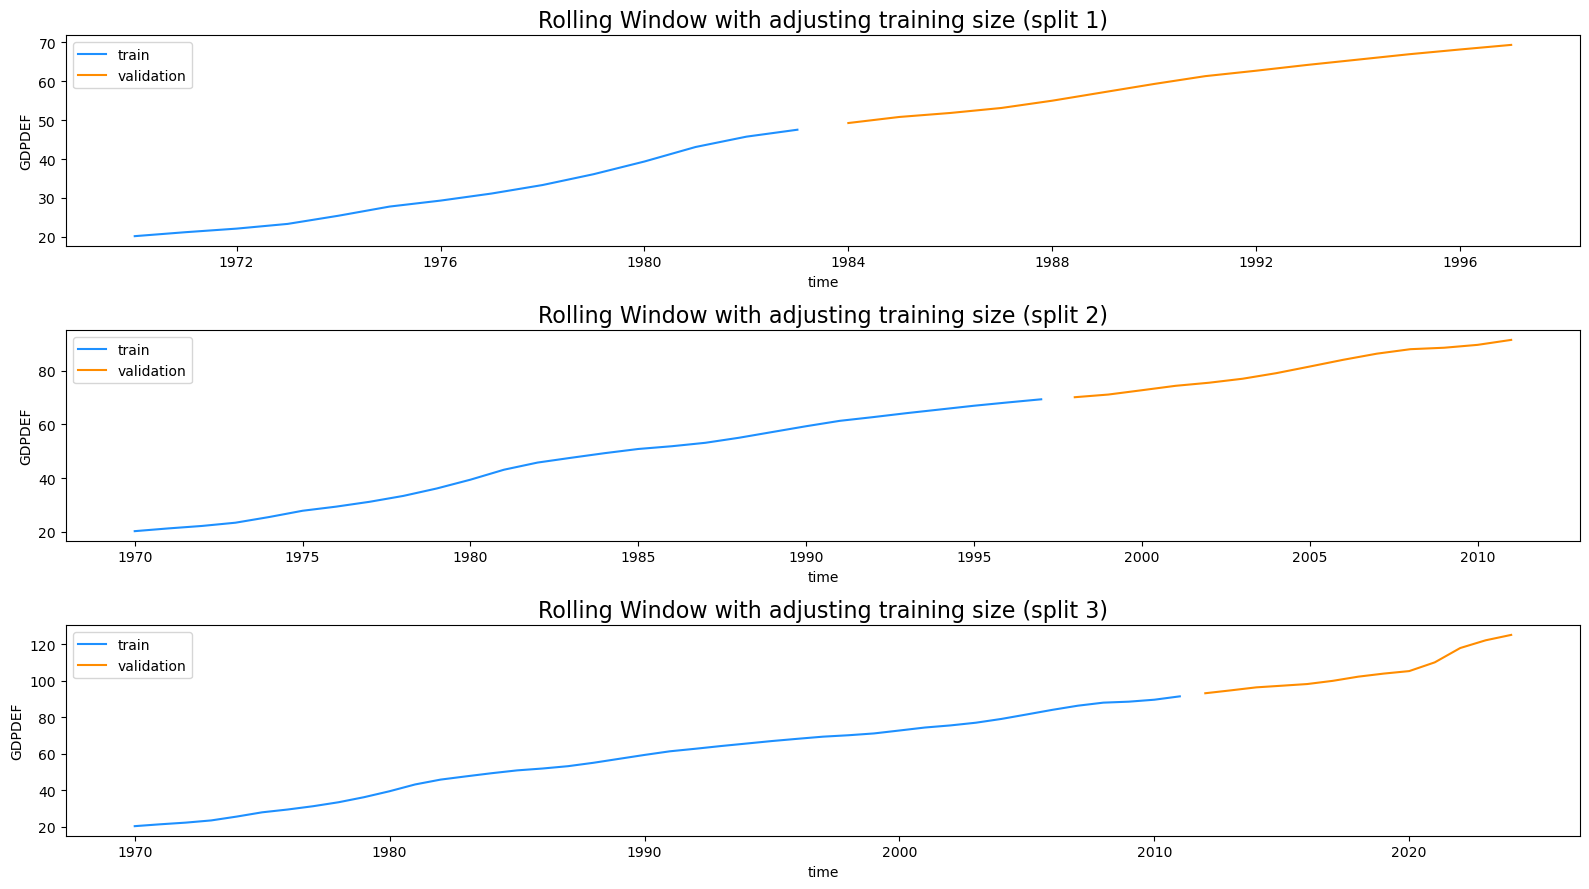

In [15]:
time_series('GDPDEF')

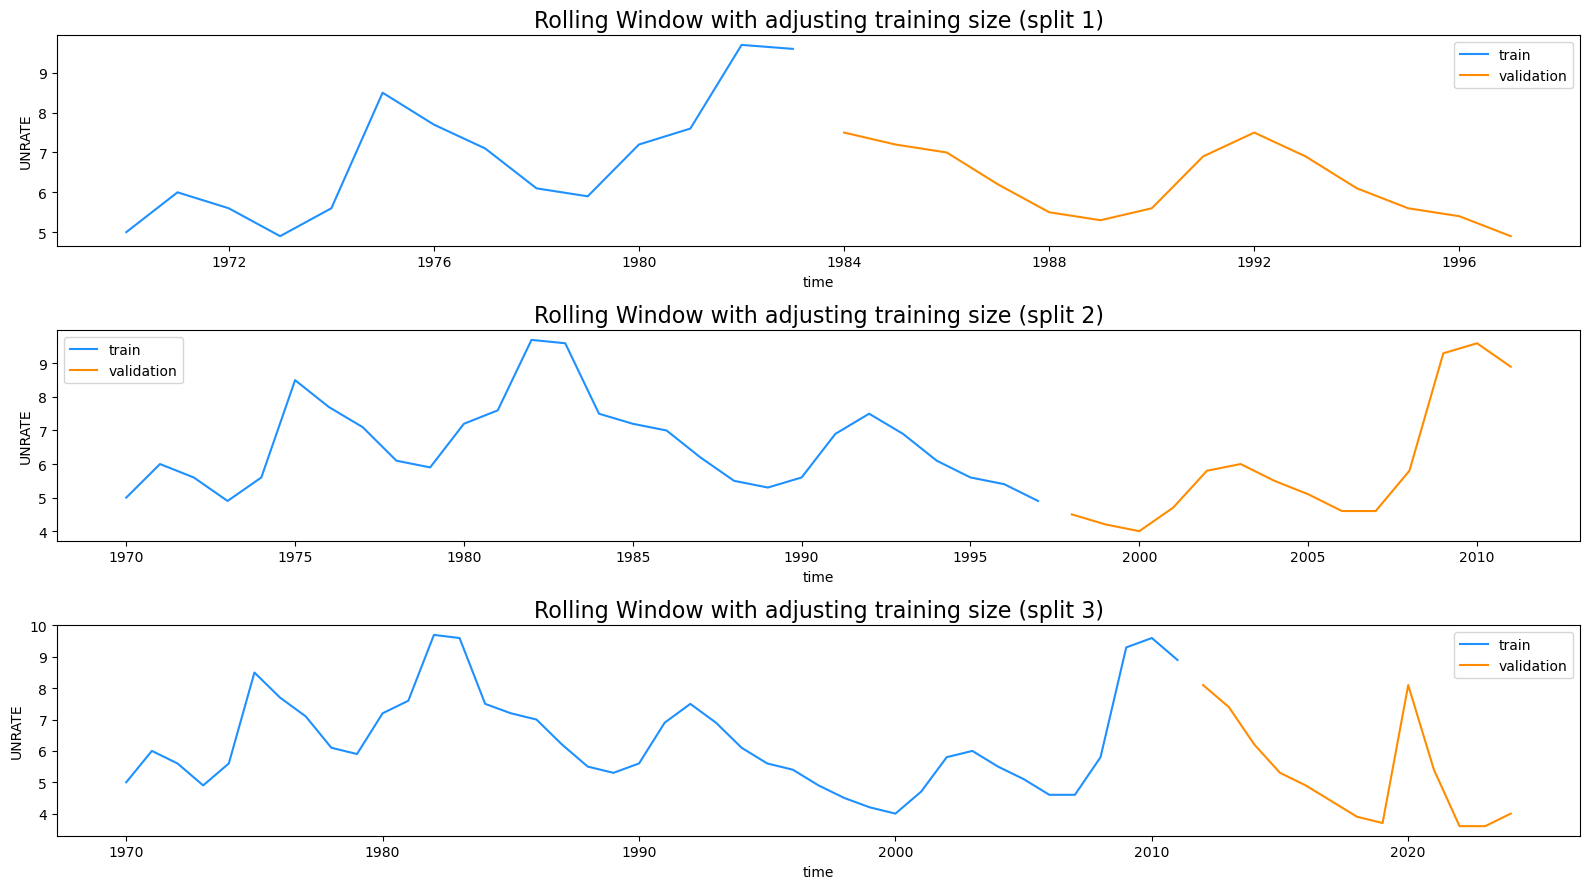

In [16]:
time_series('UNRATE')

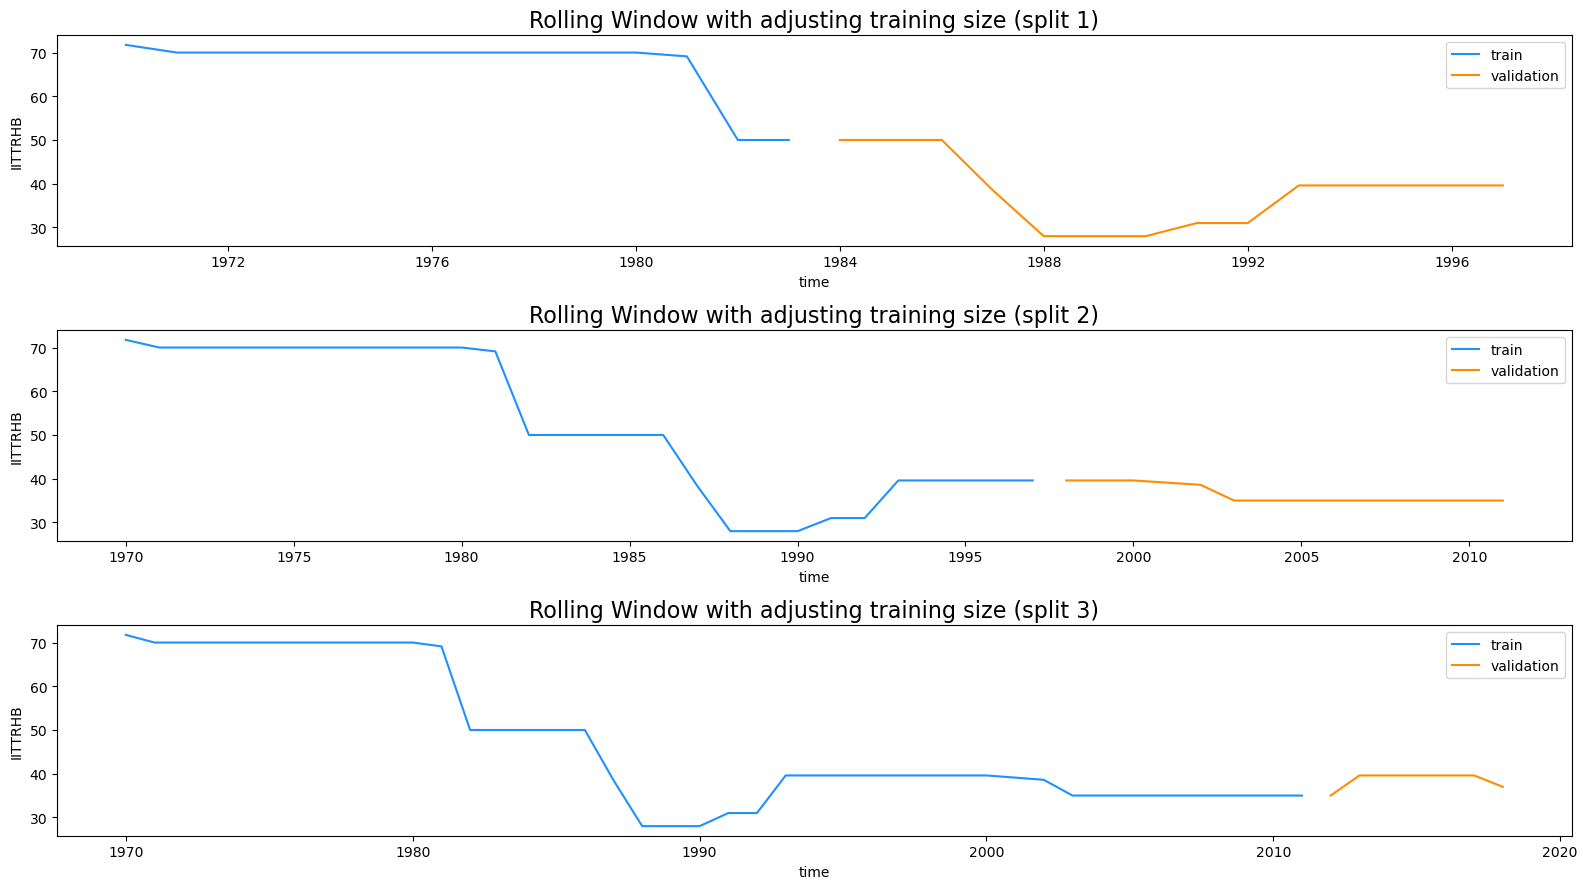

In [17]:
time_series('IITTRHB')